# Home Credit Default Risk: Exploratory Data Analysis
There are seven training data sets and one test set. The relation of the training data sets are shown below.

![Data-relation](https://raw.githubusercontent.com/jrwst36/data_science/master/Home_Credit_Default_Risk/images/Data-relations.png)

"application train" and "application test" are the primary data sets. The rest of the data sets are treated as supplimentary information, and they must be integrated with the primary train and test data sets.<p>
Let's load the data sets and begin exploring them.

***
# Explore the primary data sets

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data
train = pd.read_csv('data/application_train.csv', index_col='SK_ID_CURR')
test = pd.read_csv('data/application_test.csv', index_col='SK_ID_CURR')

target = train.TARGET
train = train.drop('TARGET', axis='columns')

***
## View the target data

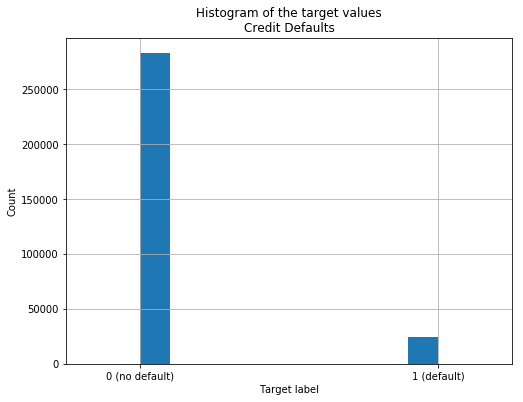

In [16]:
n_groups = 2
index = np.arange(n_groups)

plt.figure(figsize=(8,6))
target.hist()
plt.title('Histogram of the target values\nCredit Defaults')
plt.xlabel('Target label')
plt.ylabel('Count')
plt.xlim(-.25, 1.25)

plt.xticks(index, ('0 (no default)', '1 (default)'))
plt.show()

The data is imbalanced, which must be addressed with up-sampling, down-sampling, or class weights. Let's examine the rate of defaults in the training set.

In [20]:
default_rate = target.mean()
print('The default rate in the training set is {0:.4f}'.format(default_rate))

The default rate in the training set is 0.0807


***
## View the training data at a glance

In [21]:
train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### View all of the columns in the first row

In [23]:
print('Rows 1-49')
print(train.iloc[0,:50],'\n')
print('Rows 50-99')
print(train.iloc[0,50:100])
print('Rows 100-end')
print(train.iloc[0,100:])

Rows 1-49
NAME_CONTRACT_TYPE                                Cash loans
CODE_GENDER                                                M
FLAG_OWN_CAR                                               N
FLAG_OWN_REALTY                                            Y
CNT_CHILDREN                                               0
AMT_INCOME_TOTAL                                      202500
AMT_CREDIT                                            406598
AMT_ANNUITY                                          24700.5
AMT_GOODS_PRICE                                       351000
NAME_TYPE_SUITE                                Unaccompanied
NAME_INCOME_TYPE                                     Working
NAME_EDUCATION_TYPE            Secondary / secondary special
NAME_FAMILY_STATUS                      Single / not married
NAME_HOUSING_TYPE                          House / apartment
REGION_POPULATION_RELATIVE                          0.018801
DAYS_BIRTH                                             -9461
DAYS_EMPLOYED 

In [27]:
train.FLAG_DOCUMENT_2.dtype

dtype('int64')

***
## Number of columns with null values

In [24]:
def count_null_columns(dataframe):
    dtypes = ['object', 'int64', 'float64']
    count = [0,0,0]
    
    for column in dataframe.columns:
        dtype = dataframe[column].dtype
        null_present = dataframe[column].isnull().values.any()
        
        if null_present & (dtype == 'object'):
            count[0] = count[0] + 1
        if null_present & (dtype == 'int64'):
            count[1] = count[1] + 1
        if null_present & (dtype == 'float64'):
            count[2] = count[2] + 1
    
    return count

# Count null columns
train_count_null_columns = count_null_columns(train)
test_count_null_columns = count_null_columns(test)

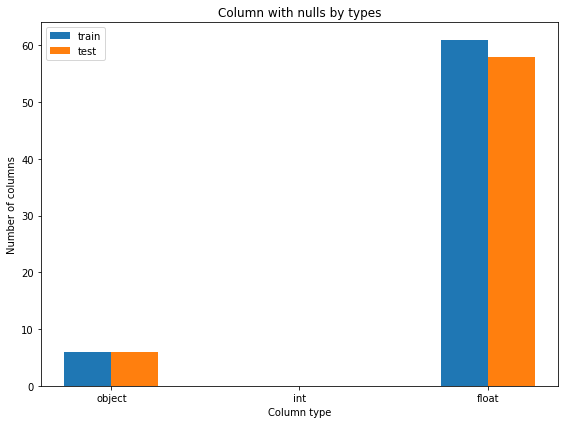

In [25]:
# create plot
n_groups = 3
plt.figure(figsize=(8,6))
index = np.arange(n_groups)
bar_width = 0.25
opacity = 1
 
plt.bar(index, train_count_null_columns, bar_width, label='train')
plt.bar(index + bar_width, test_count_null_columns, bar_width, label='test')

plt.xlabel('Column type')
plt.ylabel('Number of columns')
plt.title('Column with nulls by types')
plt.xticks(index + .5*bar_width, ('object', 'int', 'float'))
plt.legend()
 
plt.tight_layout()
plt.show()

### Examine the object columns with null values

In [28]:
train_obj_null_columns = list(train.select_dtypes(include='object').loc[:,train.isnull().any()].columns)
test_obj_null_columns = list(test.select_dtypes(include='object').loc[:,test.isnull().any()].columns)

In [29]:
def null_count(dataframe, column_list):
    null_count_list = []
    for column in column_list:
        count = dataframe[column].isnull().values.sum()
        null_count_list.append(count)
    
    return null_count_list

train_nulls = null_count(train,train_obj_null_columns)
test_nulls = null_count(test,test_obj_null_columns)

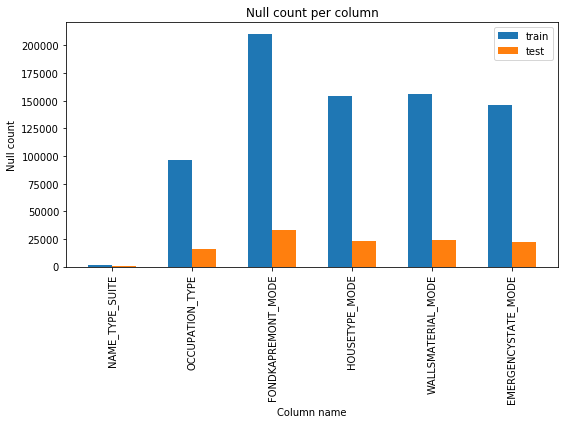

In [32]:
# create plot
n_groups = len(train_obj_null_columns)
plt.figure(figsize=(8,6))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
 
rects1 = plt.bar(index, train_nulls, bar_width, label='train')
rects2 = plt.bar(index + bar_width, test_nulls, bar_width, label='test')

plt.xlabel('Column name')
plt.ylabel('Null count')
plt.title('Null count per column')
plt.xticks(rotation=90)
plt.xticks(index + .5*bar_width, train_obj_null_columns)
plt.legend()
 
plt.tight_layout()
plt.show()

There are a high number of nulls in these object columns. Two possible approached to fill these values are to fill with the mode value, or to simply fill with "no_value". I will choose to do the later.
### Numeric columns with null values
There are about 60 numeric columns that contain null values. After examining these columns, I have decided that I will impute them with the median value.

***
## Check for outliers
I will plot the features separated into scales to view the data effectively
### Very large scale

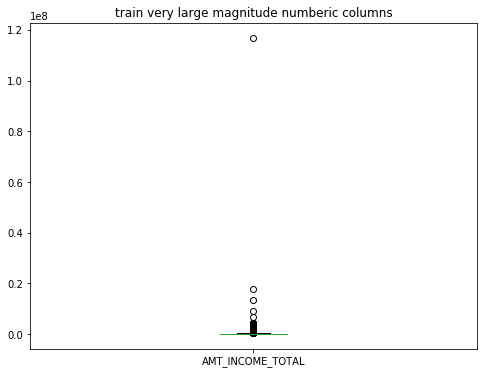

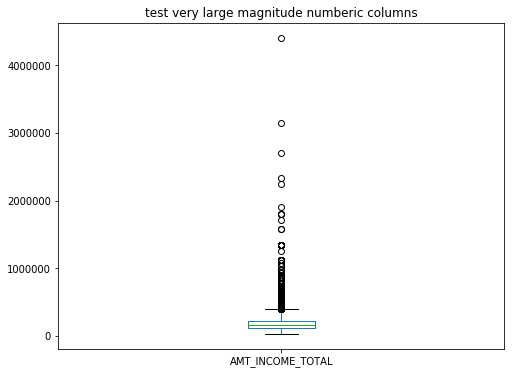

In [67]:
train_num = train.select_dtypes(exclude=['object'])
test_num = test.select_dtypes(exclude=['object'])

train_set = train_num.loc[:,train_num.abs().max() >= 5000000]
test_set = test_num.loc[:,train_num.abs().max() >= 5000000]

# Create a box plot to look for outliers
train_set.plot.box(figsize=(8,6), title='train very large magnitude numberic columns')
plt.show()
test_set.plot.box(figsize=(8,6), title='test very large magnitude numberic columns')
plt.show()

### Large scale

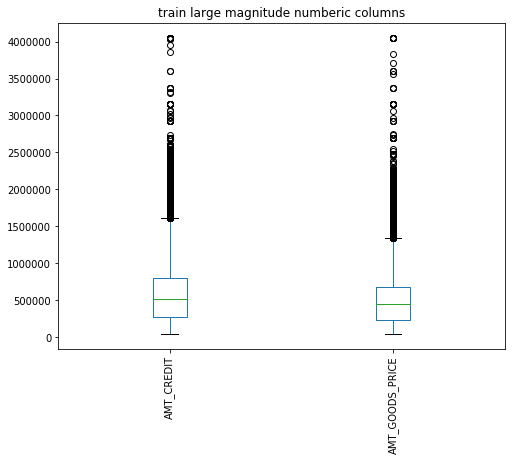

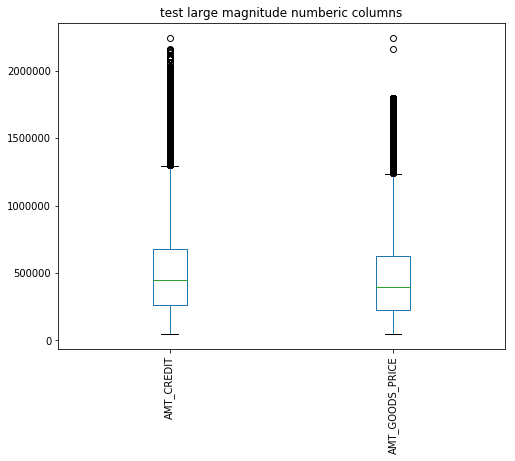

In [68]:
train_set = train_num.loc[:,(train_num.abs().max() < 5000000) & (train_num.abs().max() >= 500000)]
test_set = test_num.loc[:,(train_num.abs().max() < 5000000) & (train_num.abs().max() >= 500000)]

# Create a box plot to look for outliers
train_set.plot.box(figsize=(8,6), title='train large magnitude numberic columns',rot=90)
plt.show()
test_set.plot.box(figsize=(8,6), title='test large magnitude numberic columns',rot=90)
plt.show()

### Medium scale

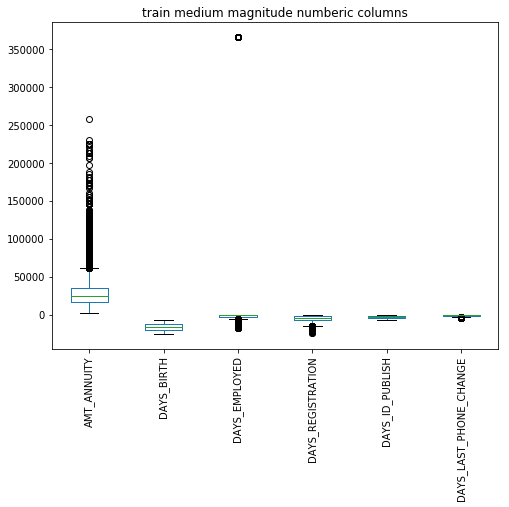

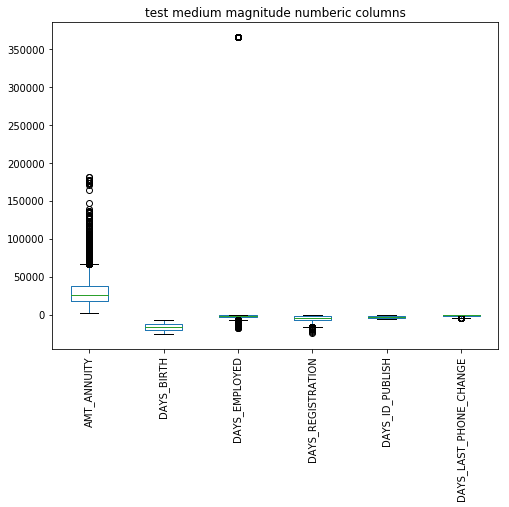

In [72]:
train_set = train_num.loc[:,(train_num.abs().max() < 500000) & (train_num.abs().max() >= 4000)]
test_set = test_num.loc[:,(train_num.abs().max() < 500000) & (train_num.abs().max() >= 4000)]

# Create a box plot to look for outliers
train_set.plot.box(figsize=(8,6), title='train medium magnitude numberic columns',rot=90)
plt.show()
test_set.plot.box(figsize=(8,6), title='test medium magnitude numberic columns',rot=90)
plt.show()

There is a clear outliner in "DAYS_EMPLOYED"
### Small scale

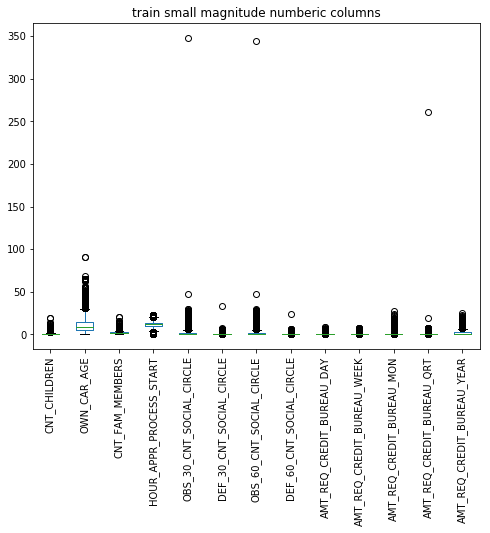

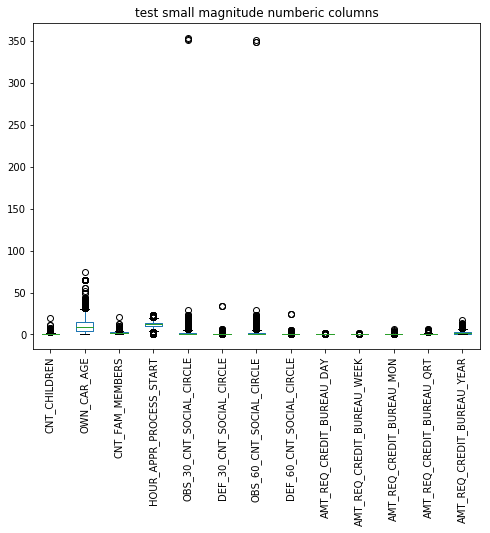

In [74]:
train_set = train_num.loc[:,(train_num.abs().max() < 4000) & (train_num.abs().max() >= 5)]
test_set = test_num.loc[:,(train_num.abs().max() < 4000) & (train_num.abs().max() >= 5)]

# Create a box plot to look for outliers
train_set.plot.box(figsize=(8,6), title='train small magnitude numberic columns',rot=90)
plt.show()
test_set.plot.box(figsize=(8,6), title='test small magnitude numberic columns',rot=90)
plt.show()

"OBS_30_CNT_SOCIAL_CIRCLE" and "OBS_60_CNT_SOCIAL_CIRCLE" both seem to have outliers. These columns are respectively defined as follows:
> How many observation of client's social surroundings with observable 30 DPD (days past due) default

and
> How many observation of client's social surroundings with observable 60 DPD (days past due) default

It is not clear if these are true values or errors. I will leave them as they are.
### Very small scale

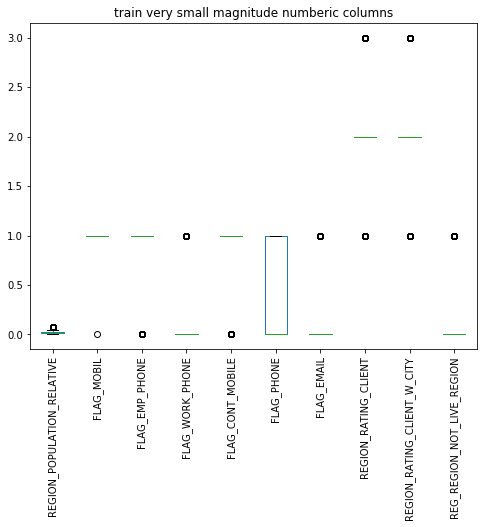

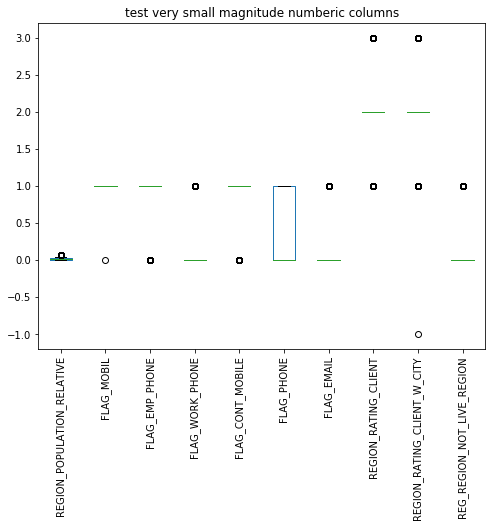

In [75]:
train_set = train_num.loc[:,(train_num.abs().max() < 5)]
test_set = test_num.loc[:,(train_num.abs().max() < 5)]

# Create a box plot to look for outliers
train_set.iloc[:,:10].plot.box(figsize=(8,6), title='train very small magnitude numberic columns',rot=90)
plt.show()
test_set.iloc[:,:10].plot.box(figsize=(8,6), title='test very small magnitude numberic columns',rot=90)
plt.show()

There is and outlier in "REGION_RATING_CLIENT_W_CITY".

# Summary of the data processing to be done
- Address imbalanced data
- Address outliers in "DAYS_EMPLOYED" and "REGION_RATING_CLIENT_W_CITY"
- Fill null values in object columns with "no_entry" or "no_value"
- Fill null values in numberic columns with the column median
***
# Explore the supplimentary data

In [80]:
bureau = pd.read_csv('data/bureau.csv', index_col='SK_ID_CURR')
bureau_balance = pd.read_csv('data/bureau_balance.csv', index_col='SK_ID_BUREAU')
prev_app = pd.read_csv('data/previous_application.csv', index_col='SK_ID_CURR')
cc_balance = pd.read_csv('data/credit_card_balance.csv', index_col='SK_ID_CURR')
payments = pd.read_csv('data/installments_payments.csv', index_col='SK_ID_CURR')
cash_balance = pd.read_csv('data/POS_CASH_balance.csv', index_col='SK_ID_CURR')

/usr/local/lib/python3.5/dist-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


***
## bureau and bureau_balance
From the data diagram at the top, we se that bureau is linked to the primary data via "SK_ID_BUREAU", and that bureau balance is linked to bureau via "SK_ID_BUREAU".

In [81]:
bureau.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
SK_ID_CURR,,,,,,,,,,,,,,,,
215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [82]:
bureau_balance.head()

,MONTHS_BALANCE,STATUS
SK_ID_BUREAU,,
5715448,0,C
5715448,-1,C
5715448,-2,C
5715448,-3,C
5715448,-4,C


### Null values in bureau and bureau_balance

In [87]:
bureau_nulls = pd.DataFrame(null_count(bureau,bureau.columns), index=bureau.columns, columns=['Null count'])
bureau_balance_nulls = pd.DataFrame(null_count(bureau_balance,bureau_balance.columns),
                                    index=bureau_balance.columns, columns=['Null count'])

In [88]:
bureau_nulls

,Null count
SK_ID_BUREAU,0
CREDIT_ACTIVE,0
CREDIT_CURRENCY,0
DAYS_CREDIT,0
CREDIT_DAY_OVERDUE,0
DAYS_CREDIT_ENDDATE,105553
DAYS_ENDDATE_FACT,633653
AMT_CREDIT_MAX_OVERDUE,1124488
CNT_CREDIT_PROLONG,0
AMT_CREDIT_SUM,13


In [89]:
bureau_balance_nulls

,Null count
MONTHS_BALANCE,0
STATUS,0


### bureau ouliers

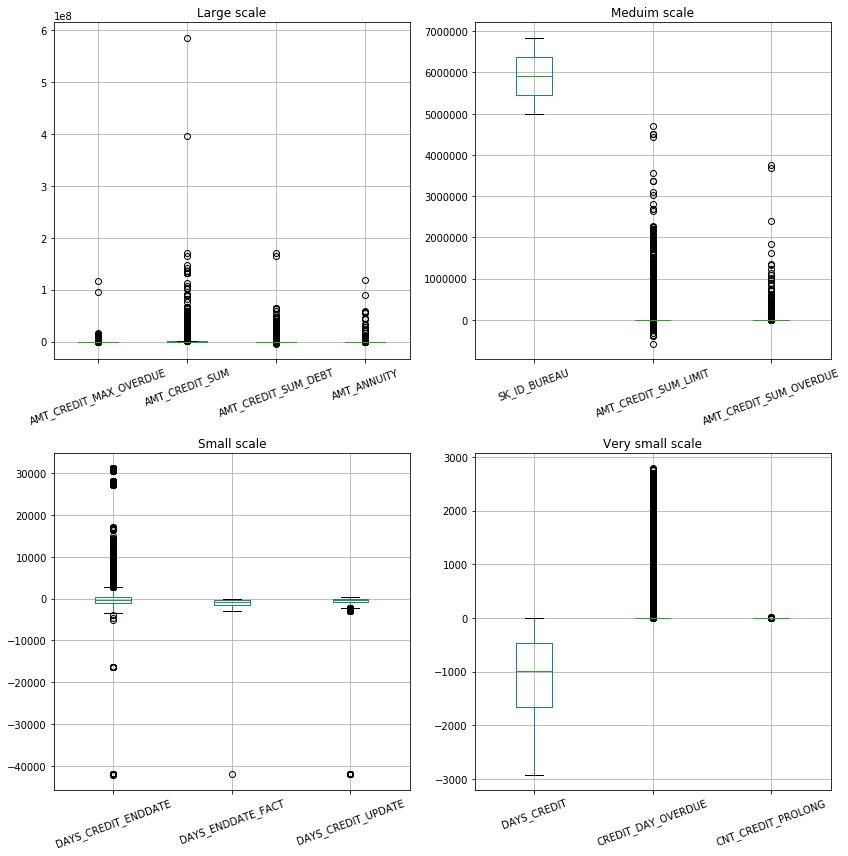

In [116]:
bureau_num = bureau.select_dtypes(exclude='object')

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
bureau_num.loc[:,bureau_num.abs().max() >= 10000000].boxplot(rot=20)
plt.title('Large scale')

plt.subplot(2,2,2)
bureau_num.loc[:,(bureau_num.abs().max() < 10000000) & (bureau_num.abs().max() >= 1000000)].boxplot(rot=20)
plt.title('Meduim scale')

plt.subplot(2,2,3)
bureau_num.loc[:,(bureau_num.abs().max() < 1000000) & (bureau_num.abs().max() >= 10000)].boxplot(rot=20)
plt.title('Small scale')

plt.subplot(2,2,4)
bureau_num.loc[:,bureau_num.abs().max() < 10000].boxplot(rot=20)
plt.title('Very small scale')

plt.tight_layout()
plt.show()

It appears that "DAYS_ENDDATE_FACT" may have an outlier.

## bureau and bureau_balance strategy
- Impute the "DAYS_ENDDATE_FACT" outlier to median
- To integrate bureau_balance to bureau: 
    - get dummy values of "status"
    - group by SK_ID_BUREAU and sum the dummies.
    - join the two data frames on SK_ID_BUREAU.
- Since there will be a lot of missing values once all the supplimentary data is integrate with the primary day, I will not fill the null values. Instead, I will use a classifier that can handle null values.
***
## previous_application and dependents

In [117]:
prev_app.head()

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
271877,2030495,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
108129,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
122040,2523466,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
176158,2819243,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
202054,1784265,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
cc_balance.head()

,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
378907,2562384,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
363914,2582071,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
371185,1740877,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
337855,1389973,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
126868,1891521,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [119]:
payments.head()

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
SK_ID_CURR,,,,,,,
161674,1054186,1.0,6,-1180.0,-1187.0,6948.360,6948.360
151639,1330831,0.0,34,-2156.0,-2156.0,1716.525,1716.525
193053,2085231,2.0,1,-63.0,-63.0,25425.000,25425.000
199697,2452527,1.0,3,-2418.0,-2426.0,24350.130,24350.130
167756,2714724,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [120]:
cash_balance.head()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
SK_ID_CURR,,,,,,,
182943,1803195,-31,48.0,45.0,Active,0,0
367990,1715348,-33,36.0,35.0,Active,0,0
397406,1784872,-32,12.0,9.0,Active,0,0
269225,1903291,-35,48.0,42.0,Active,0,0
334279,2341044,-35,36.0,35.0,Active,0,0


### Null values, previous_application

In [121]:
pd.DataFrame(null_count(prev_app,prev_app.columns), index=prev_app.columns, columns=['Null count'])

,Null count
SK_ID_PREV,0
NAME_CONTRACT_TYPE,0
AMT_ANNUITY,372235
AMT_APPLICATION,0
AMT_CREDIT,1
AMT_DOWN_PAYMENT,895844
AMT_GOODS_PRICE,385515
WEEKDAY_APPR_PROCESS_START,0
HOUR_APPR_PROCESS_START,0
FLAG_LAST_APPL_PER_CONTRACT,0


### Null values, credit_card_balance

In [122]:
pd.DataFrame(null_count(cc_balance,cc_balance.columns), index=cc_balance.columns, columns=['Null count'])

,Null count
SK_ID_PREV,0
MONTHS_BALANCE,0
AMT_BALANCE,0
AMT_CREDIT_LIMIT_ACTUAL,0
AMT_DRAWINGS_ATM_CURRENT,749816
AMT_DRAWINGS_CURRENT,0
AMT_DRAWINGS_OTHER_CURRENT,749816
AMT_DRAWINGS_POS_CURRENT,749816
AMT_INST_MIN_REGULARITY,305236
AMT_PAYMENT_CURRENT,767988


### Null values, installments_payments

In [123]:
pd.DataFrame(null_count(payments,payments.columns), index=payments.columns, columns=['Null count'])

,Null count
SK_ID_PREV,0
NUM_INSTALMENT_VERSION,0
NUM_INSTALMENT_NUMBER,0
DAYS_INSTALMENT,0
DAYS_ENTRY_PAYMENT,2905
AMT_INSTALMENT,0
AMT_PAYMENT,2905


### Null values, cash_balance

In [124]:
pd.DataFrame(null_count(cash_balance,cash_balance.columns), index=cash_balance.columns, columns=['Null count'])

,Null count
SK_ID_PREV,0
MONTHS_BALANCE,0
CNT_INSTALMENT,26071
CNT_INSTALMENT_FUTURE,26087
NAME_CONTRACT_STATUS,0
SK_DPD,0
SK_DPD_DEF,0


### Outliers, previous_application

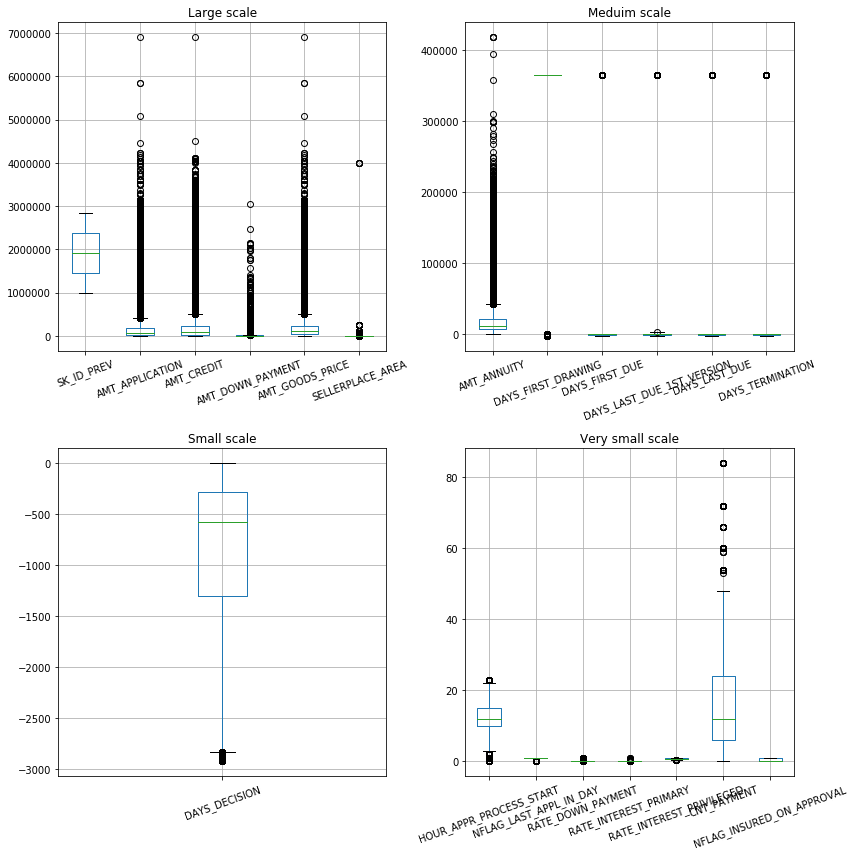

In [131]:
prev_app_num = prev_app.select_dtypes(exclude='object')

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
prev_app_num.loc[:,prev_app_num.abs().max() >= 1000000].boxplot(rot=20)
plt.title('Large scale')

plt.subplot(2,2,2)
prev_app_num.loc[:,(prev_app_num.abs().max() < 1000000) & (prev_app_num.abs().max() >= 100000)].boxplot(rot=20)
plt.title('Meduim scale')

plt.subplot(2,2,3)
prev_app_num.loc[:,(prev_app_num.abs().max() < 100000) & (prev_app_num.abs().max() >= 1000)].boxplot(rot=20)
plt.title('Small scale')

plt.subplot(2,2,4)
prev_app_num.loc[:,prev_app_num.abs().max() < 100].boxplot(rot=20)
plt.title('Very small scale')

plt.tight_layout()
plt.show()

It seems that there are outlier in "DAYS_FIRST_DRAWING", "DAYS_FIRST_DUE", "DAYS_LAST_DUE_1ST_VERSION", "DAYS_LAST_DUE", AND "DAYS_TERMINATION".
### Outliers, credit_card_balance

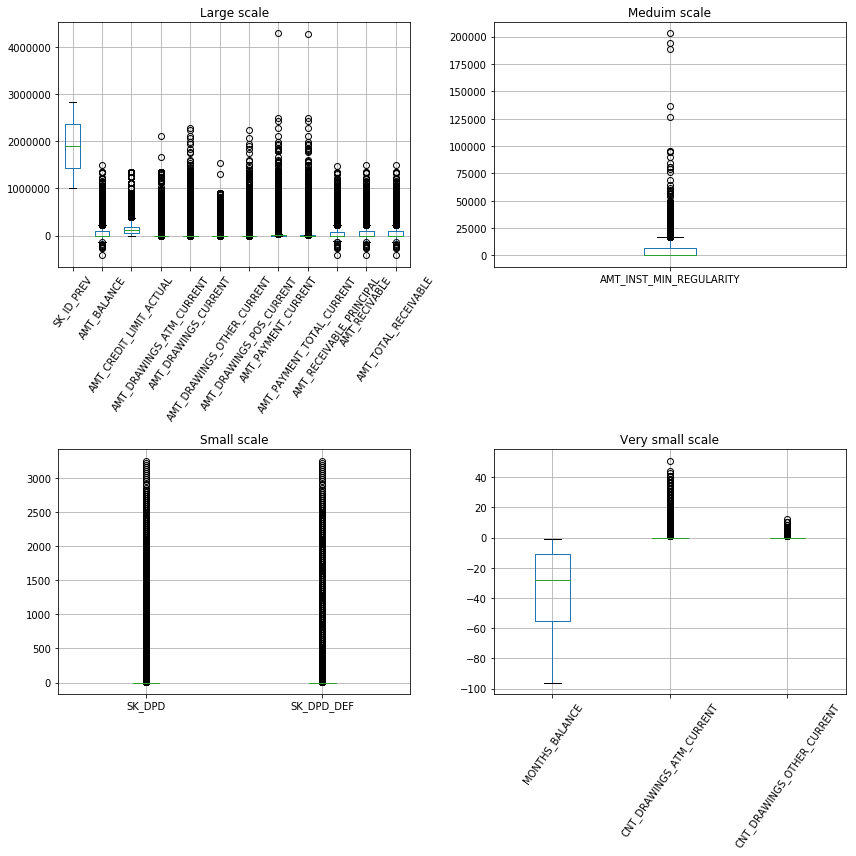

In [135]:
cc_balance_num = cc_balance.select_dtypes(exclude='object')

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
cc_balance_num.loc[:,cc_balance_num.abs().max() >= 1000000].boxplot(rot=55)
plt.title('Large scale')

plt.subplot(2,2,2)
cc_balance_num.loc[:,(cc_balance_num.abs().max() < 1000000) & (cc_balance_num.abs().max() >= 100000)].boxplot(rot=0)
plt.title('Meduim scale')

plt.subplot(2,2,3)
cc_balance_num.loc[:,(cc_balance_num.abs().max() < 100000) & (cc_balance_num.abs().max() >= 1000)].boxplot(rot=0)
plt.title('Small scale')

plt.subplot(2,2,4)
cc_balance_num.loc[:,cc_balance_num.abs().max() < 100].boxplot(rot=55)
plt.title('Very small scale')

plt.tight_layout()
plt.show()

### Outliers, cash_balance

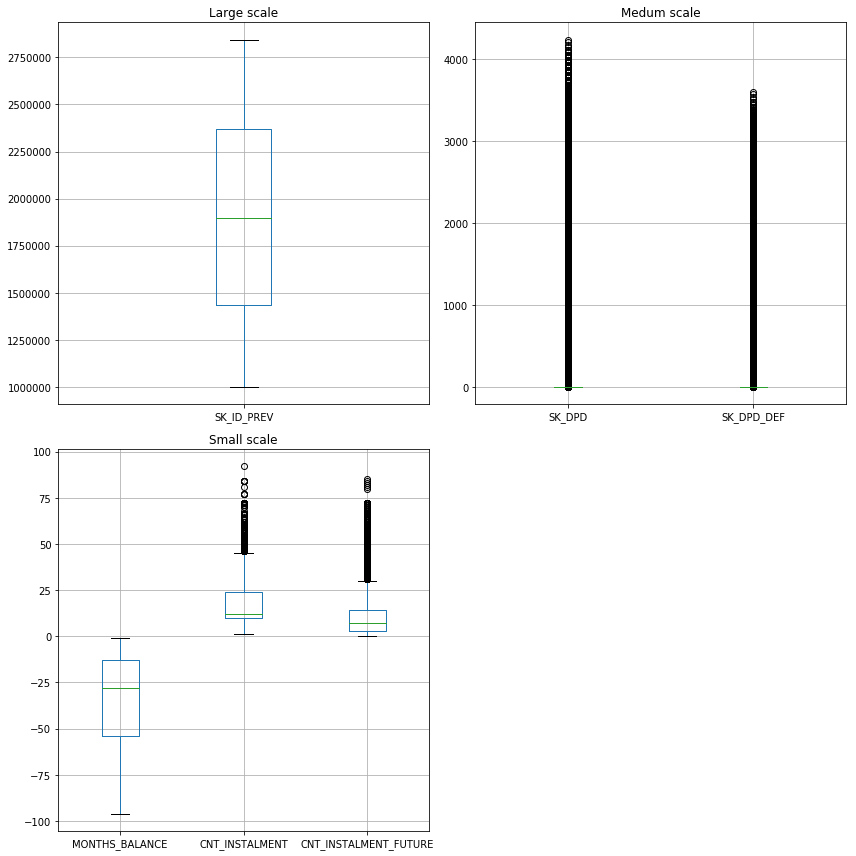

In [137]:
cash_balance_num = cash_balance.select_dtypes(exclude='object')

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
cash_balance_num.loc[:,cash_balance_num.abs().max() >= 1000000].boxplot(rot=0)
plt.title('Large scale')

plt.subplot(2,2,2)
cash_balance_num.loc[:,(cash_balance_num.abs().max() < 100000) & (cash_balance_num.abs().max() >= 1000)].boxplot(rot=0)
plt.title('Medum scale')

plt.subplot(2,2,3)
cash_balance_num.loc[:,cash_balance_num.abs().max() < 100].boxplot(rot=0)
plt.title('Small scale')

plt.tight_layout()
plt.show()

## previous_application and dependents strategy
- As stated above, I am going to leave the null values in these data sets, and use a classifier that can handle null values
- Address outliers in "previous_application" with the median.
- Since all of these forms have "SK_ID_CURR", I will independently join them to the primary data.